Random Forest model 

In [1]:
# Lets Import the required Python library to start the Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = "C:\\Users\\Ravi Nadageri\\Desktop\\Py_Practice _file\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\rock_density_xray.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<AxesSubplot:xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

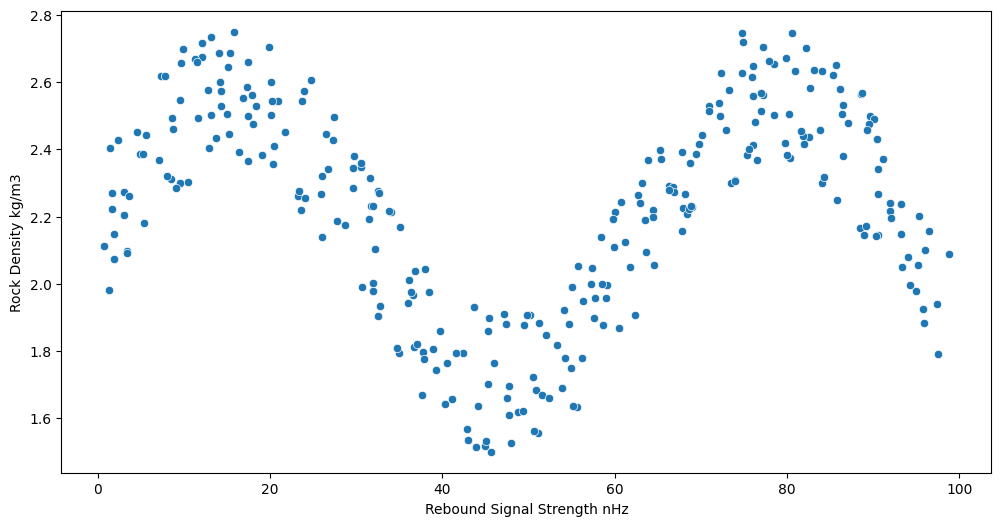

In [7]:
plt.rcParams['figure.figsize'] = (12,6)
sns.scatterplot(x='Rebound Signal Strength nHz', y='Rock Density kg/m3',data=df)

In [8]:
df.columns = ['signal','density']

In [9]:
df

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [10]:
X = df['signal'].values.reshape(-1,1)
y = df['density']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr_model = LinearRegression()

In [15]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [16]:
lr_pred = lr_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mab = mean_absolute_error(y_test,lr_pred)
mab

0.211198973318633

In [19]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2570051996584629

In [20]:
todo = np.arange(0,100)

In [21]:
signal = lr_model.predict(todo.reshape(-1,1))

In [22]:
signal

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

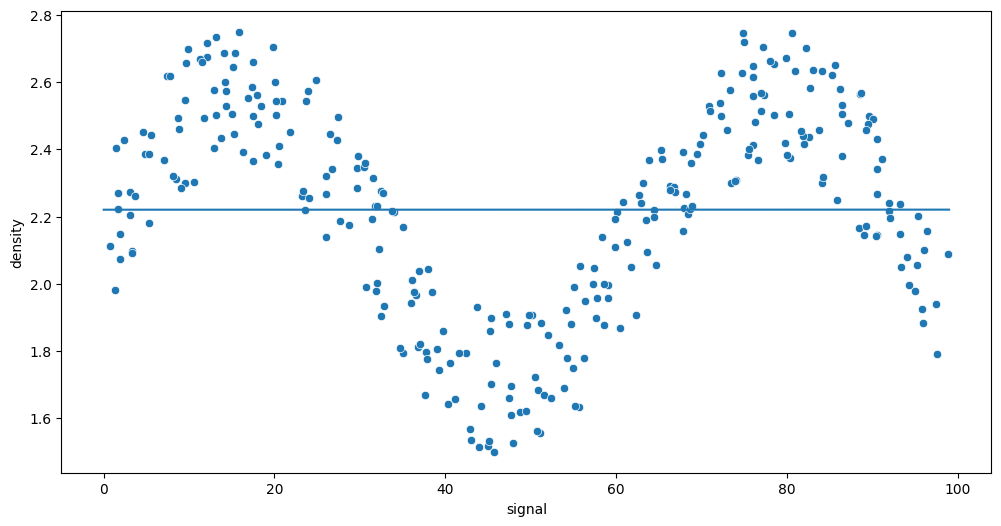

In [23]:

sns.scatterplot(x='signal', y='density',data=df)

plt.plot(todo,signal)

In [24]:
def run_model (model,X_train, X_test, y_train, y_test):

    # fit model training
    model.fit(X_train,y_train)

    # get the metrics numbers
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    mae = mean_absolute_error(y_test,pred)
    print(f'MAE :{mae}')
    print(f'RMSE : {rmse}')

    # Plot the model signal range
    signal_range = np.arange(0,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))

    sns.scatterplot(x='signal',y='density',data=df)
    plt.plot(signal_range,signal_pred)

MAE :0.211198973318633
RMSE : 0.2570051996584629


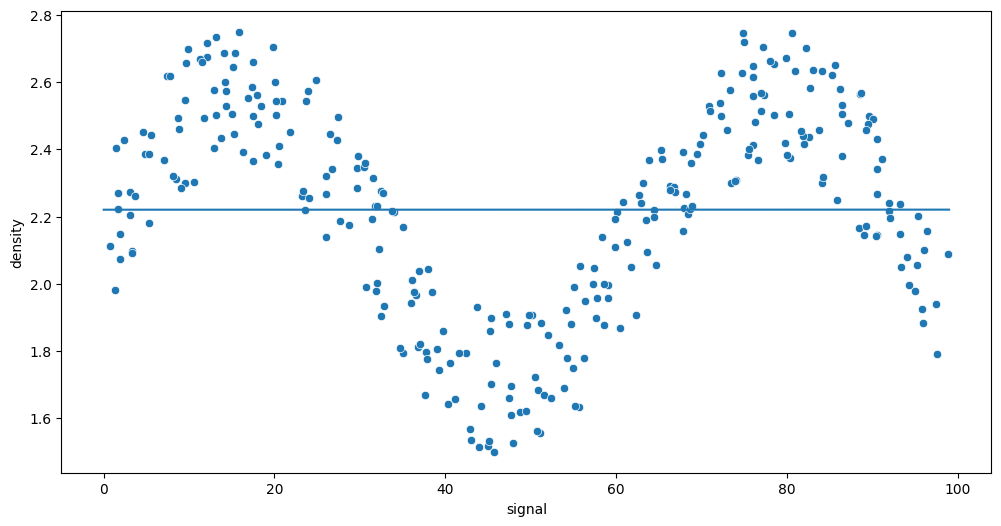

In [25]:
model = LinearRegression()
run_model (model,X_train, X_test, y_train, y_test)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [32]:
pipe = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())

MAE :0.11864312011579757
RMSE : 0.14452813084167157


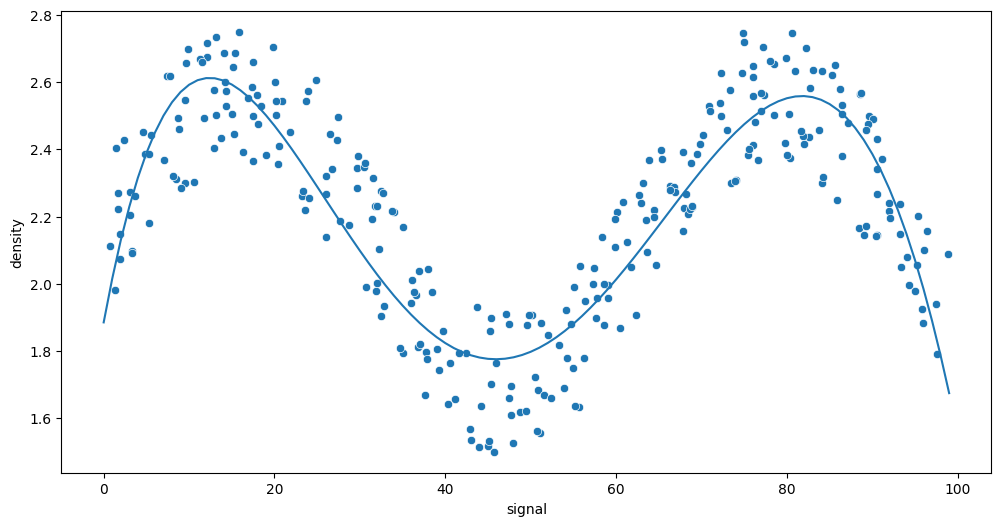

In [33]:
run_model (pipe,X_train, X_test, y_train, y_test) #based on chart you can varry the degree

In [38]:
from sklearn.neighbors import KNeighborsRegressor

MAE :0.13363165935705318
RMSE : 0.15954234753677107


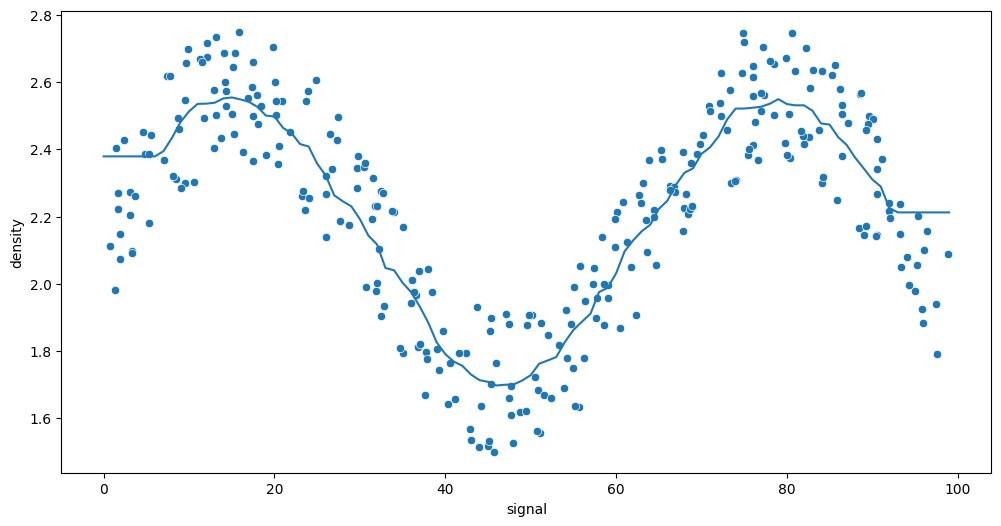

In [40]:
k_value = [30]

for n in k_value:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model (model,X_train, X_test, y_train, y_test)

In [41]:
from sklearn.tree import DecisionTreeRegressor

MAE :0.11877297474442378
RMSE : 0.1523487028635337


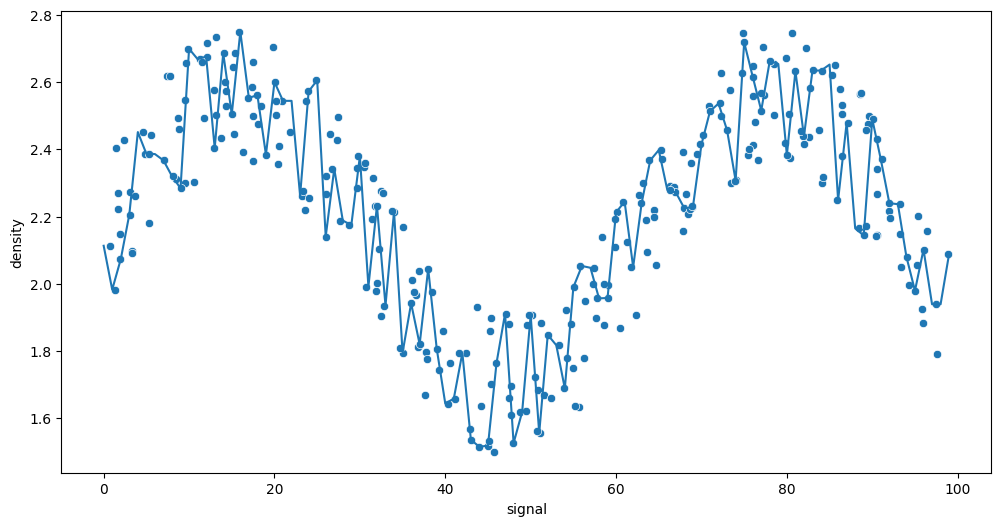

In [42]:
model = DecisionTreeRegressor()
run_model (model,X_train, X_test, y_train, y_test)

Support vector machine

In [44]:
from sklearn.svm import SVR

In [45]:
from sklearn.model_selection import GridSearchCV

In [48]:
svr = SVR()

param_grid = {'C':[0,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\svm\_base.py", line 333, in _dense_fit
    ) = libsv

MAE :0.10854210121348368
RMSE : 0.12646999302046696


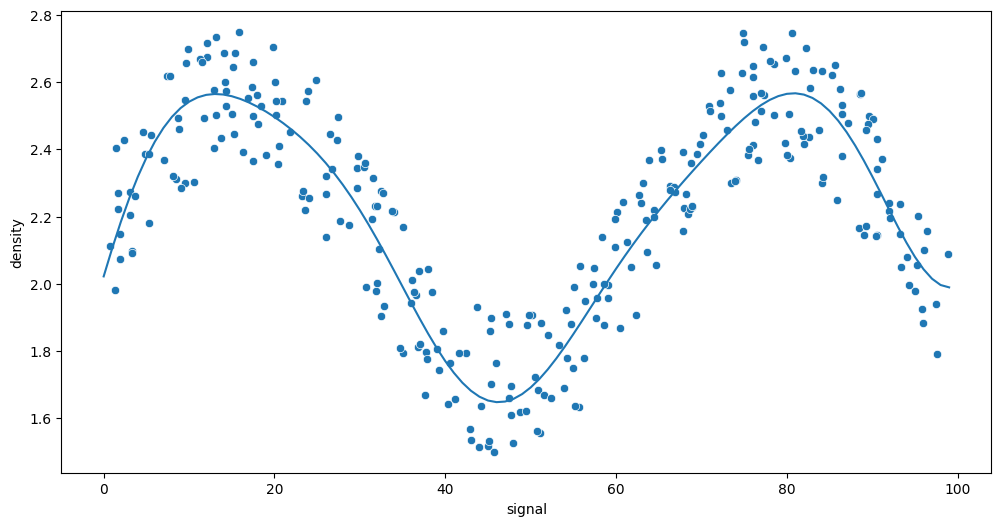

In [49]:
run_model (grid,X_train, X_test, y_train, y_test)

Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor(n_estimators=10)

MAE :0.11601091573320559
RMSE : 0.14158547889966738


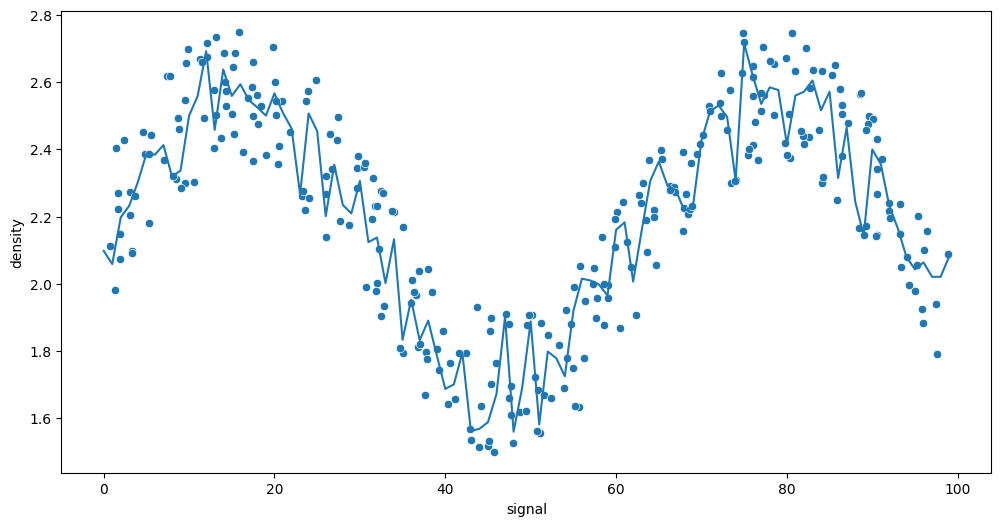

In [53]:
run_model (rfr,X_train, X_test, y_train, y_test)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [55]:
model = GradientBoostingRegressor()

MAE :0.11318284854800689
RMSE : 0.13294148649584667


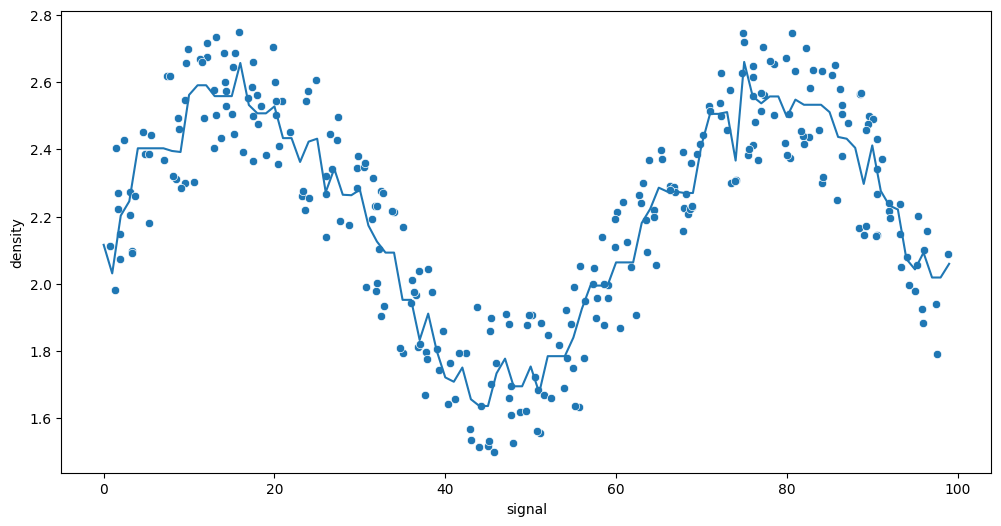

In [56]:
run_model (model,X_train, X_test, y_train, y_test)

MAE :0.11275712439031614
RMSE : 0.13101228082584354


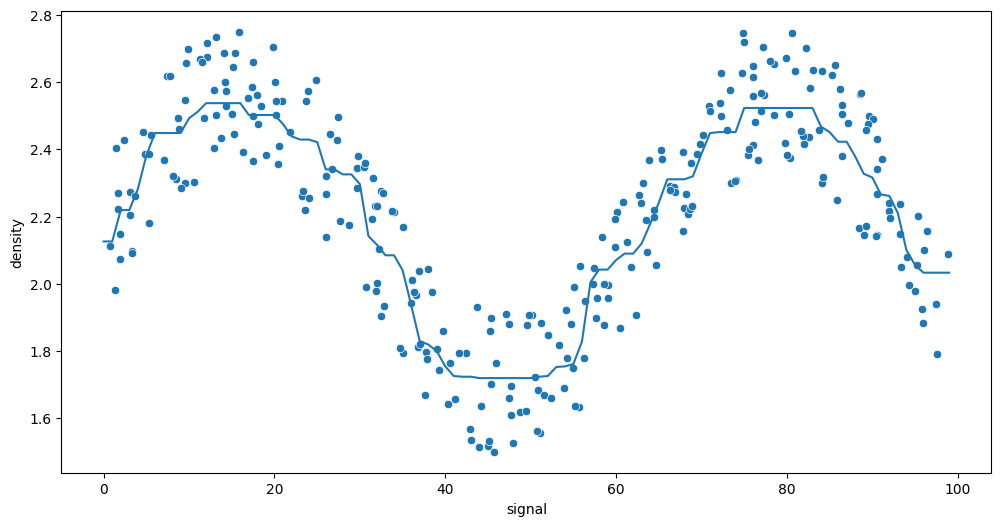

In [57]:
model = AdaBoostRegressor()
run_model (model,X_train, X_test, y_train, y_test)